In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##### Load the dataset

In [3]:
df =pd.read_csv('Datasets/Mall_Customers.csv')

In [4]:
df


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
# Take two inputs from the given table 
x = df[['Annual Income (k$)','Spending Score (1-100)']]

#x = df.iloc[:,[3,4]]

In [6]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
##### Visualize

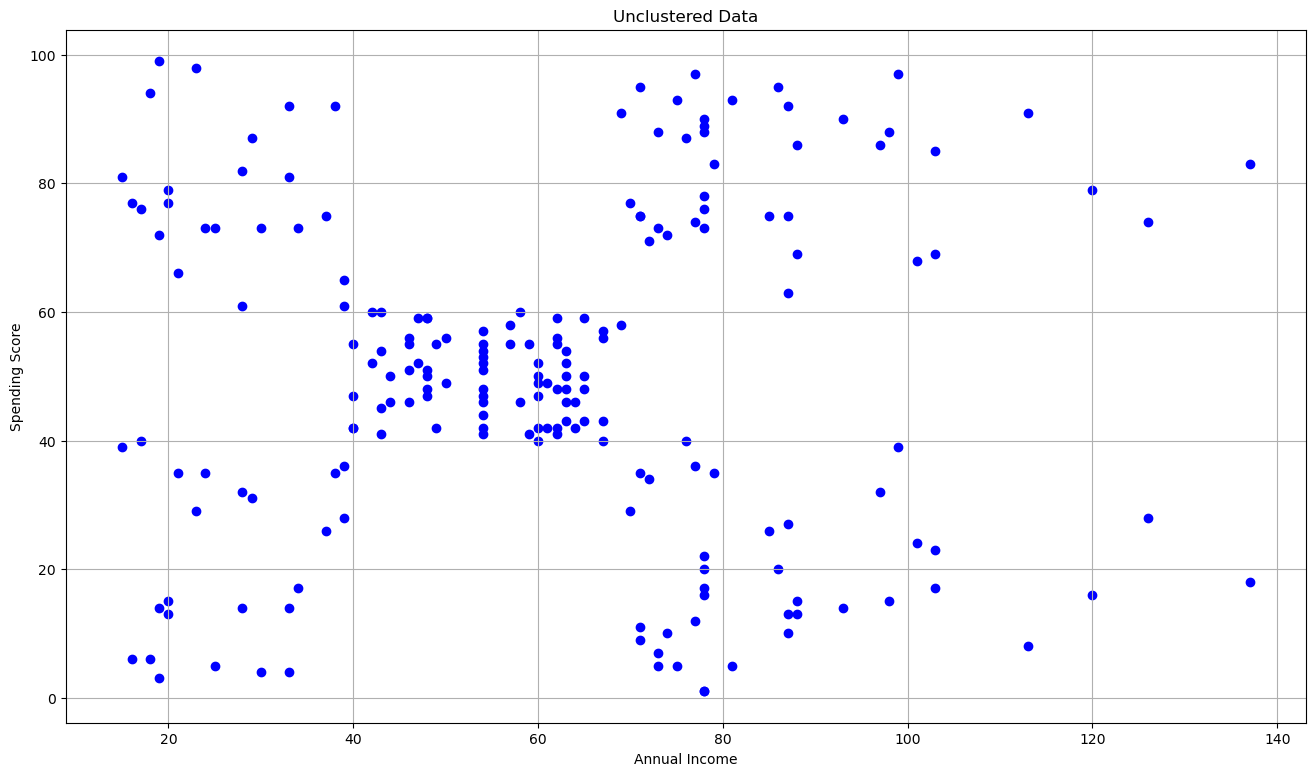

In [8]:
plt.figure(figsize=(16,9))
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0],x.iloc[:,1], color ='b', marker ='o')

In [9]:
#####Elbow Method   

In [10]:
from sklearn.cluster import KMeans
km = KMeans(random_state=0, n_clusters=10)  #K is selected as 3 by selecting n_clusters=3 .When clusters increases SSE decreases

In [11]:
km.fit(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, random_state=0)

In [13]:
sse = []
for k in range(1,16):
    km = KMeans(random_state=0, n_clusters=k, n_init=10)
    km.fit(x)
    sse.append(km.inertia_)
    sse

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [14]:
sse

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25095.703209997544,
 21830.041978049434,
 20736.67993892412,
 17702.595932296277,
 15810.838613705502,
 14763.330402558206,
 13165.329070181626,
 12064.939000692291]

km.inertia_  #To get Sum Squared Error. SSE

In [24]:
km.inertia_

12064.939000692291

In [25]:
km.labels_

array([11, 14,  4, 14, 11, 14,  4,  9,  4, 14,  4,  9,  4, 14,  4, 14, 11,
       14, 11,  9, 11, 14,  4, 14,  4, 14, 11,  3, 11,  9,  4, 14,  4,  9,
        4, 14,  4,  3, 11,  3, 11,  9, 11,  3, 11,  3,  7,  7,  7,  7,  7,
        3,  7,  3,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  0,  0,  7,  0,  7,  0,  0,  7,  7,  0,
        7,  0,  0,  0,  0,  0,  8,  0,  8,  8,  0,  0,  0,  8,  0,  8,  0,
        0,  0,  0,  8,  0,  8,  8,  0,  0,  0,  8,  8,  0,  0,  8,  0,  8,
        0,  0,  8,  0,  5,  8, 12,  8,  5,  1, 12,  1, 12,  8, 12,  1,  5,
        1, 12,  1, 12,  1,  5,  8,  5,  1,  5,  8, 12,  1,  5,  1,  5,  1,
       12,  1,  5,  1, 12,  1, 12,  8,  5,  1,  5,  6, 12,  6,  5,  6, 12,
        6, 12,  1,  5,  6,  5,  6, 12,  6,  2,  6,  2,  6,  2,  6,  2,  6,
        2,  6,  2,  6,  2, 13,  2, 13, 10, 13, 10, 13, 10])

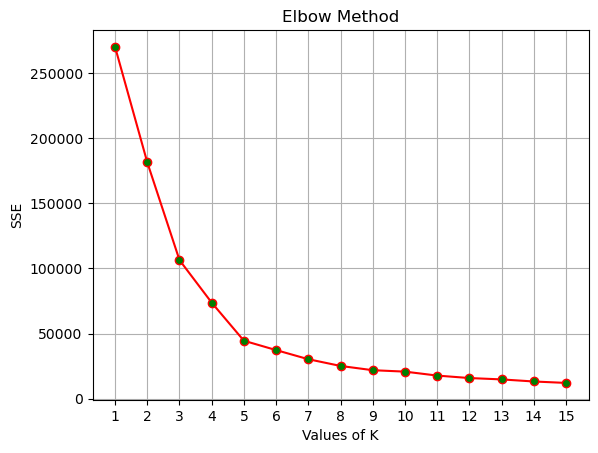

In [15]:
plt.title('Elbow Method')
plt.grid()
plt.xlabel('Values of K')
plt.ylabel('SSE')
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,color='red',marker='o',mfc='green')
# from the diagram the best fit value for k is 5.It is known as elbow.

In [16]:
pip install knee

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [17]:
pip install kneed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from kneed import KneeLocator

In [19]:
kl = KneeLocator(range(1,16),sse,curve='convex', direction='decreasing')

In [20]:
kl.elbow

5

In [22]:
##### Silhouette Method Silhouette score is positive it will be more to its own centroid.if -ve it will be more into neighboring cluster. The value is in between +1 and -1

In [26]:
from sklearn.metrics import silhouette_score

In [33]:
silh= []
for k in range(2,16):# range  has to start from 2 onwards.For 1 cluster comparison with neigbouring cluster is not possible
    km = KMeans(random_state=0, n_clusters=k, n_init=10)
    km.fit(x)
    score = silhouette_score(x,km.labels_)
    silh.append(score)
   

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [34]:
silh

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5379675585622219,
 0.5264283703685728,
 0.45704384633565154,
 0.4563032021725485,
 0.4492169169017592,
 0.437104484577306,
 0.42507724579994494,
 0.4361876168478583,
 0.40466460708668867,
 0.4139878808497294]

<BarContainer object of 14 artists>

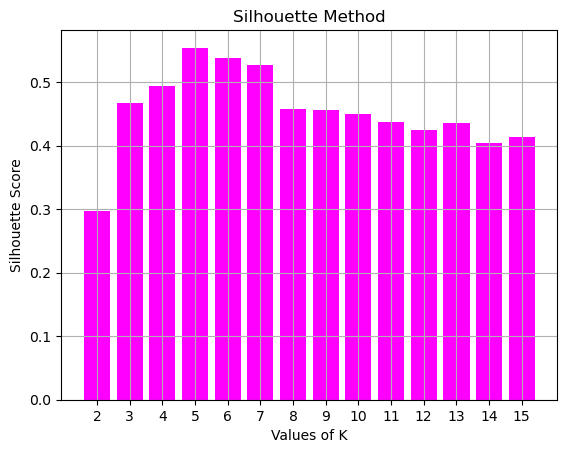

In [36]:
plt.title('Silhouette Method')
plt.grid()
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.xticks(range(2,16))
plt.bar(range(2,16),silh,color='magenta')
# from the diagram the best fit value for k is 5.It is known as highest silhoutte score.

In [38]:
##### Create the clusters

In [39]:
km = KMeans(random_state=0, n_clusters=5, n_init=10)

In [40]:
y = km.fit_predict(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
y # all belong to 5 clusters from 0 to 4

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [43]:
km.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [44]:
km.inertia_

44448.45544793371

In [45]:
cents = km.cluster_centers_
cents

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [46]:
##### Visualize the clusters

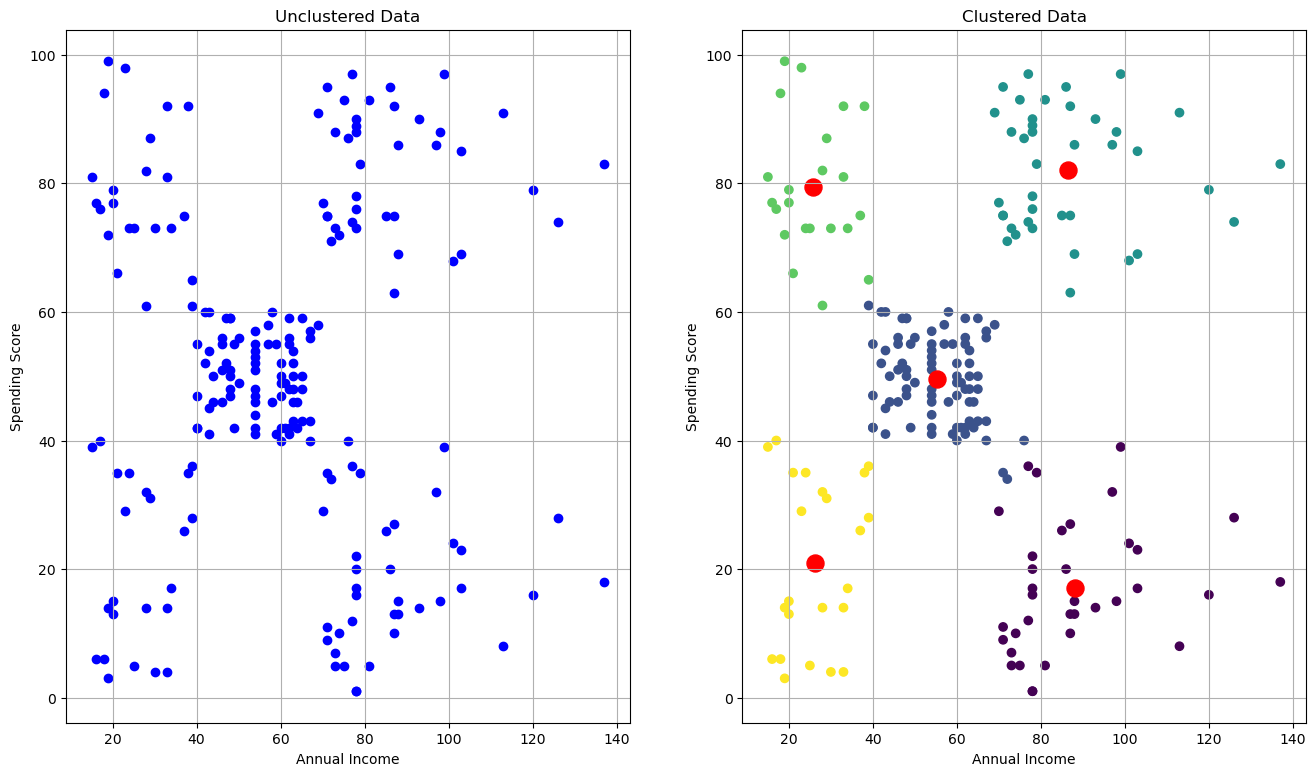

In [54]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0],x.iloc[:,1], color ='b', marker ='o')


plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0],x.iloc[:,1], marker ='o', c=y)
plt.scatter(cents[:,0],cents[:,1], color='red', s=150)

In [55]:
##### Filter the clusters

In [56]:
zero = df[y==0]
zero.shape

(35, 5)

In [58]:
one = df[y==1]
two = df[y==2]
three = df[y==3]
four = df[y==4]
zero.shape,one.shape,two.shape,three.shape, four.shape

((35, 5), (81, 5), (39, 5), (22, 5), (23, 5))

In [60]:
four.to_csv('cluster.four.csv',index =False)

In [61]:
df['label']=y

In [62]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [63]:
df.to_csv('clusteredfromunsupervised.csv',index=False)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


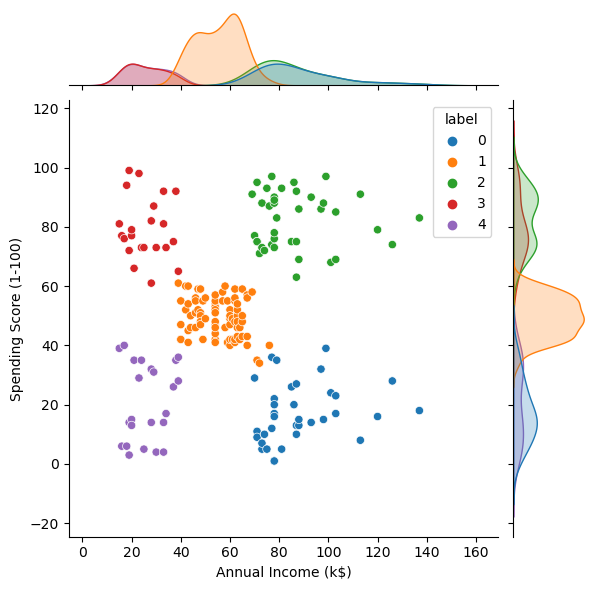

In [64]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data =df, hue = 'label', palette='tab10')

In [65]:
##### Predict on unknown data

In [66]:
new =pd.DataFrame(data=[[56,78],[21,79],[93,56],[45,41],[76,66],[23,30]], columns=x.columns)
    

In [67]:
new

,Annual Income (k$),Spending Score (1-100)
0,56,78
1,21,79
2,93,56
3,45,41
4,76,66
5,23,30


In [68]:
km.predict(new)

array([1, 3, 2, 1, 2, 4])

In [69]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

print(arr.dtype)

int32


In [71]:
import pandas as pd
s = pd.Series([1, 2, 3, 4, 5])

print(s.ndim)

1


In [72]:
import numpy as np

arr = np.array([[1, 2, 3], [4, 5, 6]])

print(arr.shape)

(2, 3)


In [73]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

print(arr.sum())

15


In [74]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

print(arr[1, 2])

6
